In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# !pip install geopy
import geopy.distance
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df_0 = pd.read_csv(r'C:\Users\mayko\OneDrive\Рабочий стол\input_data.csv', sep = ';')
df_0

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11358145,2021-12-31,6099000,4,9,3,65.0,0.0,56.041539,92.753133,0,0,660030.0,581436.0,24,857003.0
11358146,2021-12-31,2490000,1,10,2,56.9,0.0,55.169949,61.519210,0,0,454079.0,274414.0,74,1820769.0
11358147,2021-12-31,850000,2,2,2,37.0,5.0,55.946206,43.088179,0,0,606101.0,190983.0,52,958329.0
11358148,2021-12-31,4360000,5,5,1,36.0,9.0,61.256383,73.435919,0,0,628406.0,581702.0,86,2156710.0


In [3]:
print(df_0.isnull().sum())

date                   0
price                  0
level                  0
levels                 0
rooms                  0
area                   0
kitchen_area           0
geo_lat                0
geo_lon                0
building_type          0
object_type            0
postal_code       507771
street_id        4205554
id_region              0
house_id         3261943
dtype: int64


In [94]:
def generate_dataframe(city_codes, centre):
    # mask = 
    df = df_0[df_0['id_region'].isin(city_codes)]
    # df = df_0[df_0['id_region'].isin([78, 98, 178])]
    # df = df_0
    df = df['id_region level rooms area kitchen_area price building_type object_type geo_lat geo_lon'.split()]
#     df = df[beg:end]
#     %%time
#     centre = (55.752652, 37.621405)
# centre = (59.935488, 30.327516)
    coords = np.concatenate([df.geo_lat.values.reshape(-1,1), df.geo_lon.values.reshape(-1,1)], axis = 1)
    distance = list(map(lambda x: geopy.distance.geodesic(x, centre).km, coords))
    df['far_from_centre'] = distance
    df = df.drop(['geo_lat', 'geo_lon'], axis = 1)
    df = df[df['building_type'] != 0]
    df = df[df['object_type'] == 2]
    df = df[df['kitchen_area'] > 0]
    target = ['price']
    source = 'rooms area far_from_centre kitchen_area '.split()
    df = df[source + target]
    X = df[source]
    y = df[target]
    df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
    return df

In [95]:
target = ['price']
source = 'rooms area far_from_centre kitchen_area '.split()

In [96]:
# moscow
df = generate_dataframe([77, 99, 97, 177, 199, 197], (55.752652, 37.621405))
df

C:\Users\mayko\AppData\Local\Temp\ipykernel_15704\2374000068.py:23: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,rooms,area,far_from_centre,kitchen_area,price
165,1,42.3,8.287121,12.40,10503090
206,-1,20.0,8.287121,5.00,6418000
410,2,63.0,6.183763,21.00,19121000
423,1,40.7,14.360092,17.70,8457460
425,1,42.6,14.360092,12.40,7940640
...,...,...,...,...,...
10725727,1,39.3,0.158889,11.20,9820000
10725728,-1,39.4,0.158889,5.90,9800000
10730302,1,43.5,10.330806,20.10,12400000
10733441,3,72.0,0.158889,14.17,13540000


In [97]:
# ---------------------------------------------------------------

In [197]:
temp_ = df.apply(lambda x: round(x/1000, 2) if x.name in ['price'] else x,
                axis = 0) #если не разделить, то график не построится
temp_ = temp_.apply(lambda x: round(x, 2) if x.name in ['far_from_centre', 'price'] else x,
                axis = 0)
temp_ 

,rooms,area,far_from_centre,kitchen_area,price
165,1,42.3,8.29,12.40,10503.09
206,-1,20.0,8.29,5.00,6418.00
410,2,63.0,6.18,21.00,19121.00
423,1,40.7,14.36,17.70,8457.46
425,1,42.6,14.36,12.40,7940.64
...,...,...,...,...,...
10725727,1,39.3,0.16,11.20,9820.00
10725728,-1,39.4,0.16,5.90,9800.00
10730302,1,43.5,10.33,20.10,12400.00
10733441,3,72.0,0.16,14.17,13540.00


In [198]:
q1 = np.percentile(temp_['price'], 25)
q3 = np.percentile(temp_['price'], 75)
me = q3 - q1
edge = q3 + 1.5 * me
temp_ = temp_[(temp_['price'] <= np.percentile(temp_['price'], 99)) & (temp_['price'] > np.percentile(temp_['price'], 1))]
temp_

,rooms,area,far_from_centre,kitchen_area,price
165,1,42.3,8.29,12.40,10503.09
206,-1,20.0,8.29,5.00,6418.00
410,2,63.0,6.18,21.00,19121.00
423,1,40.7,14.36,17.70,8457.46
425,1,42.6,14.36,12.40,7940.64
...,...,...,...,...,...
10725727,1,39.3,0.16,11.20,9820.00
10725728,-1,39.4,0.16,5.90,9800.00
10730302,1,43.5,10.33,20.10,12400.00
10733441,3,72.0,0.16,14.17,13540.00


In [199]:
temp = temp_[0:50000]
temp_test = temp_[50000:]

In [200]:
print(temp['price'].max() * 1000)
print(temp['price'].min())

65230000.0
5093.35


In [201]:
temp.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\mayko\AppData\Local\Temp\ipykernel_15704\2867211100.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  temp.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,rooms,area,far_from_centre,kitchen_area,price
rooms,1.00,0.85,-0.03,0.45,0.57
area,0.85,1.00,-0.10,0.50,0.77
far_from_centre,-0.03,-0.10,1.00,-0.09,-0.26
kitchen_area,0.45,0.50,-0.09,1.00,0.41
price,0.57,0.77,-0.26,0.41,1.00


In [202]:
def pokazateli(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae}, RMSE: {rmse}, R^2: {r2}")    

In [203]:
def LinearReg(X_train, X_test, y_train, y_test):
#     scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
#     searching parameters
    model = LinearRegression()
    param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    print(best_params)
#     modeling
    model = LinearRegression(fit_intercept=best_params['fit_intercept'], positive=best_params['positive'])  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pokazateli(y_test, y_pred)
    return y_pred, model

In [204]:
X = temp[source]
y = temp[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
y_pred, linear_model = LinearReg(X_train, X_test, y_train, y_test)

{'fit_intercept': False, 'positive': False}
MAE: 13178.899642162776, RMSE: 13813.614936577058, R^2: -2.7052079189016007


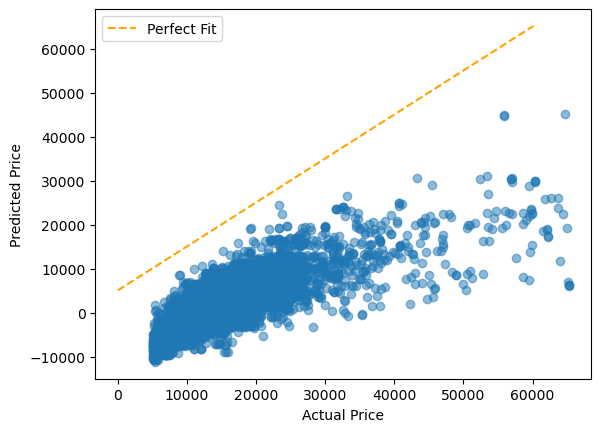

In [206]:
def test_plot(y_test, y_pred):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    perfect_line = np.arange(np.array(y_test).min(), np.array(y_test).max())
    ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.set_xlabel("Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.legend()
    plt.show

test_plot(y_test, y_pred)

In [209]:
def KNN(X_train, X_test, y_train, y_test):
#     scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
#   searching parameters
    model = KNeighborsRegressor()
    param_grid = {'n_neighbors': list(range(1, 50))}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    print(best_params)
#   modeling    
    model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'])  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pokazateli(y_test, y_pred)
    return y_pred, model

{'n_neighbors': 2}
MAE: 1940.3576225000002, RMSE: 3682.454760013723, R^2: 0.7366867384047942


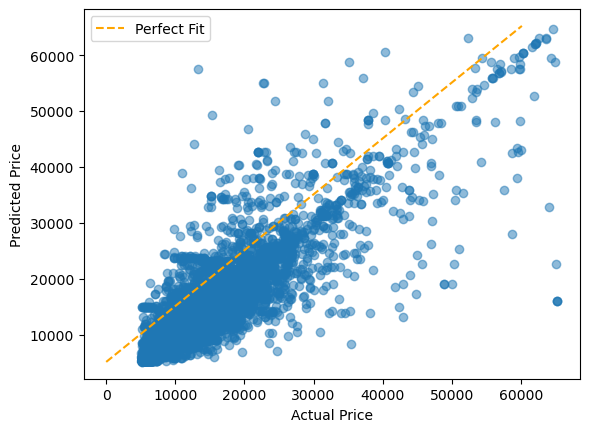

In [210]:
y_pred, knn_model = KNN(X_train, X_test, y_train, y_test)
test_plot(y_test, y_pred)

In [211]:
def les(X_train, X_test, y_train, y_test):
#     scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
#   searching parameters
#     model = RandomForestRegressor()
#     param_grid = {'n_estimators': list(range(1, 100)), 'max_depth' : list(range(1, 10)), 'bootstrap':[True, False]}
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
#     grid_search.fit(X, y)
#     best_params = grid_search.best_params_
#     print(best_params)
#   modeling    
    model = RandomForestRegressor(n_estimators=50)  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pokazateli(y_test, y_pred)
    return y_pred, model

C:\Users\mayko\AppData\Local\Temp\ipykernel_15704\1539423998.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


MAE: 2426.2620289325505, RMSE: 3815.538268627741, R^2: 0.7173106027324954


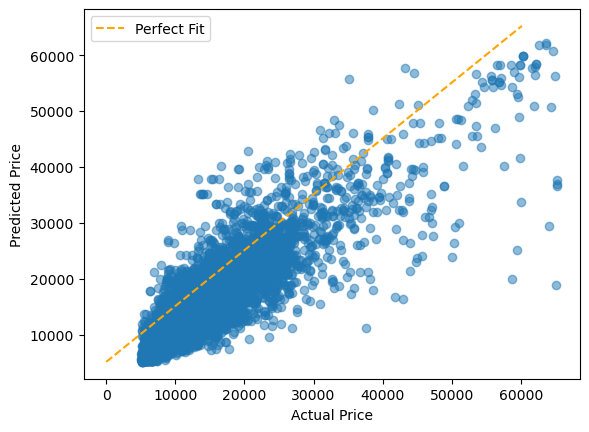

In [212]:
y_pred, les_model = les(X_train, X_test, y_train, y_test)
test_plot(y_test, y_pred)
None

In [42]:
# real testing time - on new values

In [213]:
X_test_ = temp_test[source]
Y_test_ = temp_test[target] 
scaler = StandardScaler()
X_test_ = scaler.fit_transform(X_test_)

MAE: 13492.468092672414, RMSE: 14128.268030162588, R^2: -4.056611096127021


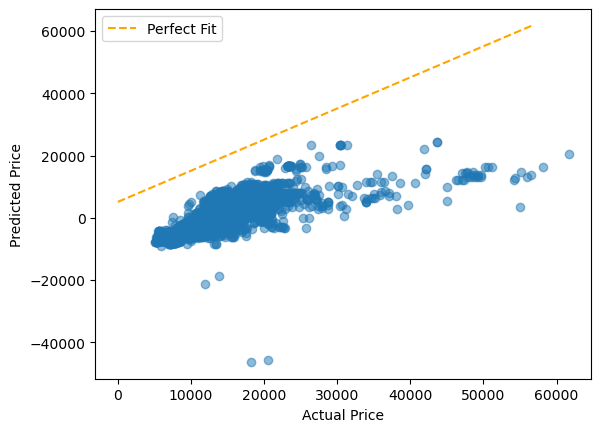

In [217]:
y_pred_linear = linear_model.predict(X_test_)
pokazateli(Y_test_, y_pred_linear)
test_plot(Y_test_, y_pred_linear)

MAE: 2836.5287499999995, RMSE: 4491.573964695032, R^2: 0.48893185264310957


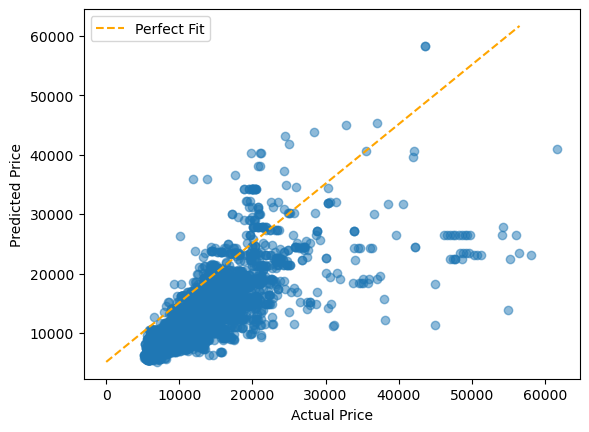

In [216]:
y_pred_knn = knn_model.predict(X_test_)
pokazateli(Y_test_, y_pred_knn)
test_plot(Y_test_, y_pred_knn)

MAE: 2244.634034844022, RMSE: 3490.267206849335, R^2: 0.6913977727181619


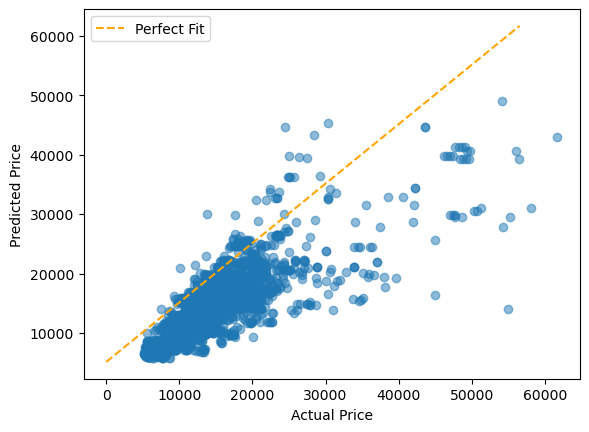

In [218]:
y_pred_les = les_model.predict(X_test_)
pokazateli(Y_test_, y_pred_les)
test_plot(Y_test_, y_pred_les)